# Non-uniform sampling in the infinite-horizon Lorentz gas 

In [1]:
using BilliardModels
include("../src/BilliardVisualisation.jl")

INFO: Loading help data...


bdraw (generic function with 7 methods)

## Calculate and draw grazing collisions with consecutive discs 

In [2]:
function grazing_collision(x, c, radius)  
    # compute position vectors of grazing collision on disc with centre c and radius r from point x

    disp = c - x
    sinθ = radius / norm(disp)
    θ = asin(sinθ)
    
    R = [cos(θ) -sin(θ); sin(θ) cos(θ)]  # rotation matrix
    direction1 = Vector2D( R * [disp[1], disp[2]] ) 
    direction2 = Vector2D( transpose(R) * [disp[1], disp[2]] )  # rotate in other direction
    
    direction1 = normalize(direction1) 
    direction2 = normalize(direction2)                          
    
    length = sqrt(normsq(disp) - radius^2)

    (x + length*direction1, x + length*direction2)
    
end

grazing_collision (generic function with 1 method)

In [101]:
ioff()
fig, axes = plt.subplots();
ion()

In [102]:
radius = 0.36
billiard_table = Sinai_billiard(radius, true, true);

In [103]:
for x in 0:1, y in 0:5
    bdraw(billiard_table, axes, Vector2D(x,y))
end

axes[:axis]("image")

(-0.5,1.3599999999999999,-0.5,5.36)

In [211]:
function initial_condition_in_channel(radius)
    xx = initial_condition(billiard_table,radius,0.5,0,0.5)[1]
    x, y = mod(xx[1], 1), mod(xx[2], 1)
    x, y
end

initial_condition_in_channel (generic function with 1 method)

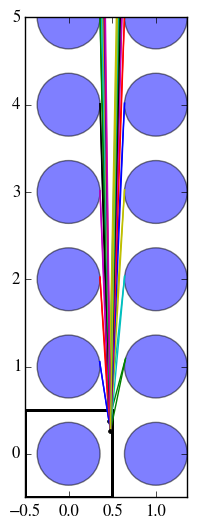

In [212]:
max_distance = 100  # limit to where generate

x, y = initial_condition_in_channel(radius)
xx = Vector2D(x, y)

grazing_points_list = Any[]

for z in 1:max_distance
    c = Vector2D(0., float(z))
    grazing_points = grazing_collision(xx, c, radius)
    grazing_point1 = grazing_points[2]  # rightmost in first column
    
    c = Vector2D(1., float(z))
    grazing_points = grazing_collision(xx, c, radius)
    grazing_point2 = grazing_points[1]  # leftmost in second column
    
    push!(grazing_points_list, (grazing_point1, grazing_point2))
    

    
end

for (grazing_point1, grazing_point2) in grazing_points_list[1:10]

    axes[:plot]( [x, grazing_point1[1]], [y, grazing_point1[2]])
    axes[:plot]( [x, grazing_point2[1]], [y, grazing_point2[2]])
end


axes[:plot](x, y, ".")

axes[:set_ylim](-0.5, 5)
fig

In [97]:
grazing_points_list;

## Calculate angles 

In [106]:
allowed_angles = Any[];

for (grazing_point1, grazing_point2) in grazing_points_list
    disp = grazing_point1 - xx
    angle1 = atan2(disp)
    
    disp = grazing_point2 - xx
    angle2 = atan2(disp)
    
    push!(allowed_angles, [angle2, angle1])
end
    

In [107]:
allowed_angles

100-element Array{Any,1}:
 [1.30891,1.72511]
 [1.46204,1.63254]
 [1.50288,1.60917]
 [1.52149,1.59862]
 [1.53211,1.59261]
 [1.53897,1.58873]
 [1.54377,1.58603]
 [1.54731,1.58403]
 [1.55003,1.5825] 
 [1.55219,1.58128]
 [1.55394,1.58029]
 [1.55539,1.57948]
 [1.55661,1.57879]
 ⋮                
 [1.56878,1.57193]
 [1.5688,1.57192] 
 [1.56882,1.57191]
 [1.56884,1.5719] 
 [1.56886,1.57189]
 [1.56888,1.57187]
 [1.5689,1.57186] 
 [1.56892,1.57185]
 [1.56894,1.57184]
 [1.56896,1.57183]
 [1.56898,1.57182]
 [1.569,1.57181]  

In [108]:
angle_ranges = 
Any[(allowed_angles[i][1], allowed_angles[i+1][1], allowed_angles[i+1][2], allowed_angles[i][2]) for i in 1:length(allowed_angles)-1]

99-element Array{Any,1}:
 (1.3089090020012568,1.4620406790098737,1.6325417432997922,1.7251059147303622)
 (1.4620406790098737,1.5028771216142394,1.609172752237159,1.6325417432997922) 
 (1.5028771216142394,1.5214906766404208,1.5986151020285368,1.609172752237159) 
 (1.5214906766404208,1.532112558522995,1.5926085433850783,1.5986151020285368) 
 (1.532112558522995,1.5389741808800925,1.5887337700809383,1.5926085433850783) 
 (1.5389741808800925,1.5437703535307652,1.5860274089061965,1.5887337700809383)
 (1.5437703535307652,1.5473110726935813,1.5840303816365702,1.5860274089061965)
 (1.5473110726935813,1.5500319805328033,1.5824961982111108,1.5840303816365702)
 (1.5500319805328033,1.5521881426047472,1.5812806947790607,1.5824961982111108)
 (1.5521881426047472,1.553938792977785,1.5802939367690565,1.5812806947790607) 
 (1.553938792977785,1.555388463139542,1.5794769155454917,1.5802939367690565)  
 (1.555388463139542,1.5566086086256277,1.5787893092034682,1.5794769155454917) 
 (1.5566086086256277,1.5576

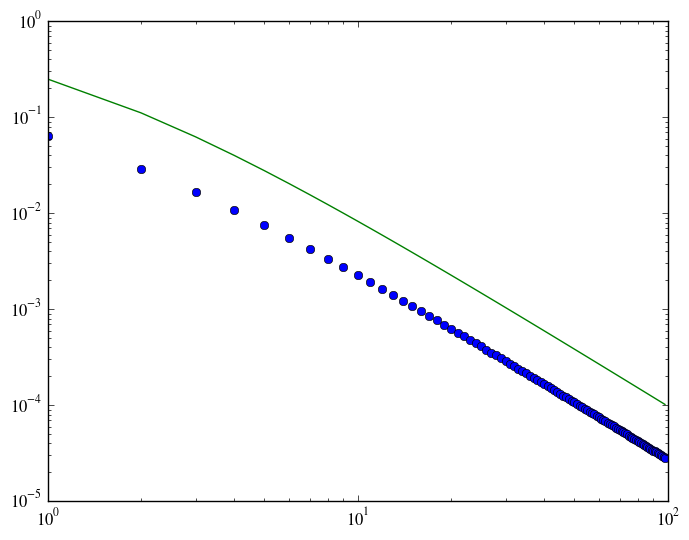

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1233af990>

In [155]:
# sizes of intervals (too naive) gives power law with exponent -2:
sizes = [b-a+d-c for (a,b,c,d) in angle_ranges]

loglog(sizes, "o")
loglog([1.:length(sizes)].^(-2))

In [365]:
# generate a uniform random number from the interval [a,b] or the interval [c,d]
function uniform_from_two_intervals(a, b, c, d)
    total_length = abs(b-a) + abs(d-c)
    
    r = rand()*total_length
    
    if r < abs(b-a)
        min(a,b) + r
    else
        min(c,d) + r - abs(b-a)
    end
end

uniform_from_two_intervals (generic function with 1 method)

In [376]:
test_interval = (1.240769282967916,1.418688135881282,1.5775049626322863,1.586722425763836)  

(1.240769282967916,1.418688135881282,1.5775049626322863,1.586722425763836)

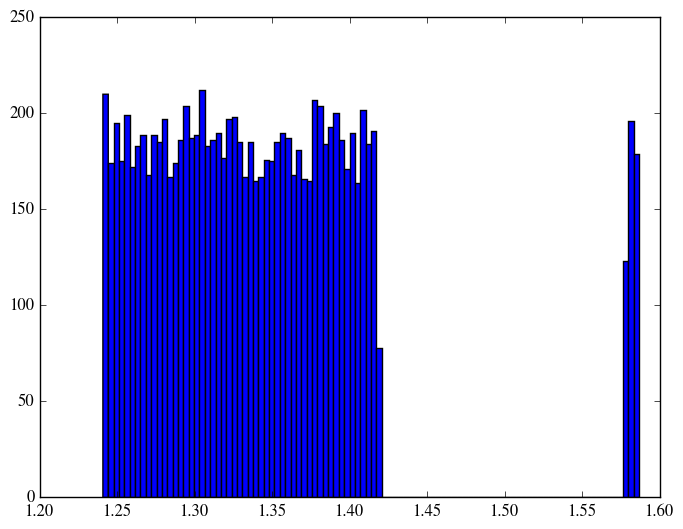

([210.0,174.0,195.0,175.0,199.0,172.0,183.0,189.0,168.0,189.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,123.0,196.0,179.0],[1.24079,1.24425,1.24771,1.25116,1.25462,1.25808,1.26154,1.265,1.26846,1.27192  …  1.55558,1.55904,1.5625,1.56596,1.56942,1.57288,1.57634,1.5798,1.58326,1.58672],{PyObject <matplotlib.patches.Rectangle object at 0x12b813810>,PyObject <matplotlib.patches.Rectangle object at 0x12b693dd0>,PyObject <matplotlib.patches.Rectangle object at 0x12b693c50>,PyObject <matplotlib.patches.Rectangle object at 0x12b693690>,PyObject <matplotlib.patches.Rectangle object at 0x12b685990>,PyObject <matplotlib.patches.Rectangle object at 0x12b685e90>,PyObject <matplotlib.patches.Rectangle object at 0x12b679a10>,PyObject <matplotlib.patches.Rectangle object at 0x12b679710>,PyObject <matplotlib.patches.Rectangle object at 0x12b511c90>,PyObject <matplotlib.patches.Rectangle object at 0x12b511a50>  …  PyObject <matplotlib.patches.Rectangle object at 0x12c05f790>,PyObject <matplotlib.patches.Rectangle

In [380]:
data = Float64[]
for i in 1:10000
    push!(data, uniform_from_two_intervals(test_interval...))
end

#plot(data, zeros(data), ".")
plt.hist(data, 100)

## Generate initial conditions 

In [182]:
using Distributions
using StatsBase

In [319]:
#probs = ones(max_distance-1)  # impose the desired probability distribution
#probs = collect(1:max_distance-1)  # -1 since have angle differences. Replace by treating remaining angles correctly

probs = collect(1.:max_distance-1).^(-1)

probs /= sum(probs);

chooser = sampler(Categorical(probs));   # from Distributions

AliasTable with 99 entries

Check that the distribution comes out correctly:

In [169]:
# Calculate histogram:
# counts = countmap(frequencies)  # from StatsBase
# kk = collect(keys(counts)); plot(kk, [counts[k] for k in kk], "o", )

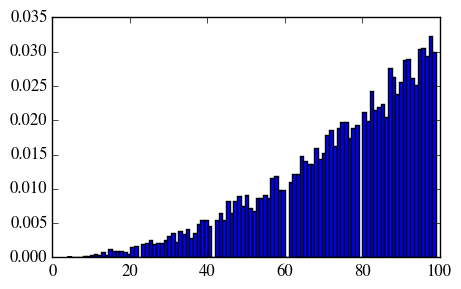

In [206]:
N = 10000; frequencies = rand(chooser, N);

figure(figsize=(5, 3))
plt.hist(frequencies, 100, normed=true);

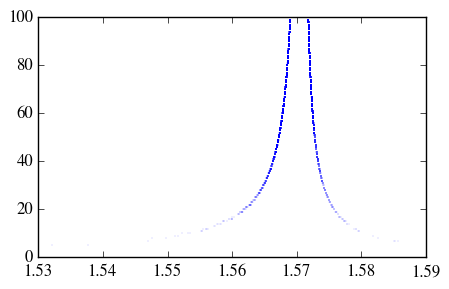

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x12c20d310>

In [207]:
N = 10000  # num of initial conditions

heights = Any[]
angles = Any[]

for i in 1:N
    height = rand(chooser)
    angle = uniform_from_two_intervals(angle_ranges[height]...)
    
    push!(heights, height)
    push!(angles, angle)
    
    #@show height, angle
end    

figure(figsize=(5,3))
plot(angles, heights, ".", alpha=0.5, markersize=0.3)


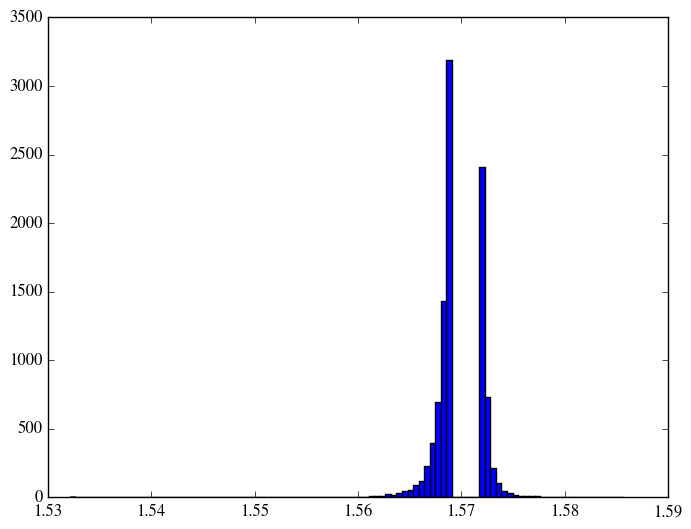

In [208]:
plt.hist(angles, 100);

## Non-uniform sampling 

- Generate uniform initial position e.g. inside the channel
- Generate height
- Find corresponding angle range
- Generate sin(angle) uniformly in the available range

In [479]:
function calculate_grazing_angles(xx, height)
    
    angles = Float64[]
    
    for z in [height-1, height]
        c = Vector2D(1., float(z))  # centre of disc
        grazing_points = grazing_collision(xx, c, radius)
        grazing_point = grazing_points[2]  # rightmost in first column

        disp = grazing_point - xx
        push!(angles, atan2(disp))

        c = Vector2D(0., float(z))
        grazing_points = grazing_collision(xx, c, radius)
        grazing_point = grazing_points[1]  # leftmost in second column

        disp = grazing_point - xx
        push!(angles, atan2(disp))
    end

    sort(angles)
    
end


# generate an initial condition by sampling the height from the imposed distribution
# and then sampling the angle "uniformly" in the available angles:

function sample(height_chooser)  
    x, y = initial_condition_in_channel(radius)
    xx = Vector2D(x, y)
    
    height = rand(height_chooser)
    while height <= 2
        height = rand(height_chooser)
    end

    #sin_angles = map(sin, calculate_grazing_angles(xx, height))
    angles = calculate_grazing_angles(xx, height)
    θ = uniform_from_two_intervals(angles...)
#    sinθ = uniform_from_two_intervals(sin_angles...)
 #   θ = asin(sinθ)

    xx, θ, height
end


sample (generic function with 1 method)

In [435]:
# Setup:
radius = 0.36

#probs = ones(1.:max_distance-1)
probs = float(sizes)
#probs = collect(2.:max_distance-1).^(2)
probs /= sum(probs);
height_chooser = sampler(Categorical(probs));   # from Distributions

AliasTable with 99 entries

In [436]:
angles = Float64[]
N = 100000
for i in 1:N
    xx, angle, height = sample(height_chooser)
    push!(angles, angle)
end

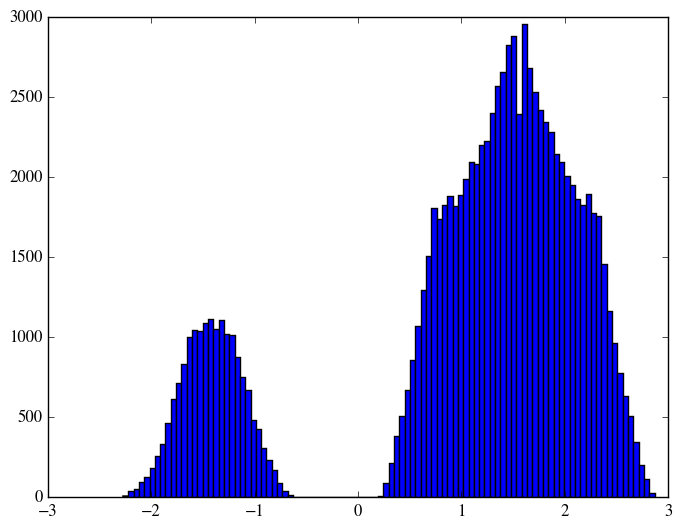

In [437]:
plt.hist(angles, 100);

In [362]:
xx = initial_condition(billiard_table, -0.5, 0.5, -0.5, 0.5)[1]

Vector2D{Float64}(0.25905646757461276,0.4104870551965132)

In [363]:
calculate_grazing_angles(xx, 10)

4-element Array{Float64,1}:
 1.44298
 1.45625
 1.63534
 1.64285

In [364]:
map(sin, ans)

4-element Array{Float64,1}:
 0.991843
 0.993446
 0.997918
 0.997405

## True free path distribution 

In [438]:
include("../src/Wang_Landau.jl")

explore_phase_space (generic function with 4 methods)

In [463]:
N = 10^6

free_paths = Float64[]

@time for i in 1:N
    xx, vv = initial_condition(billiard_table, -0.5, 0.5, -0.5, 0.5)
    push!(free_paths, first_free_path(billiard_table, xx, vv))
end

elapsed time: 11.017282471 seconds (4861700544 bytes allocated, 46.75% gc time)


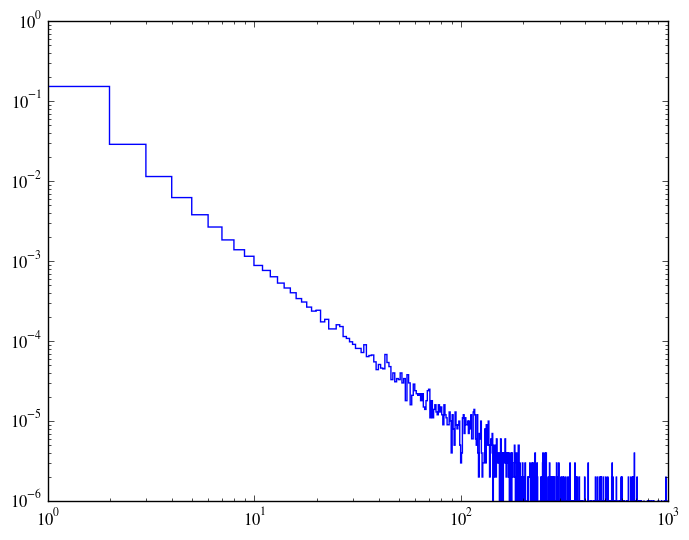

(1,1000)

In [464]:
plt.hist(free_paths[free_paths.<1000], 1000, normed=true, histtype="step")
xscale("log")
yscale("log")
xlim(1, 1000)

In [465]:
bins = logspace(0, 3, 1000)
bins2, counts = hist(free_paths, bins)

([1.0,1.00694,1.01393,1.02096,1.02804,1.03518,1.04236,1.04959,1.05688,1.06421  …  939.665,946.185,952.75,959.361,966.017,972.72,979.47,986.266,993.109,1000.0],[1702,1715,1810,1650,1678,1634,1715,1711,1737,1666  …  1,0,0,0,1,1,0,3,0,1])

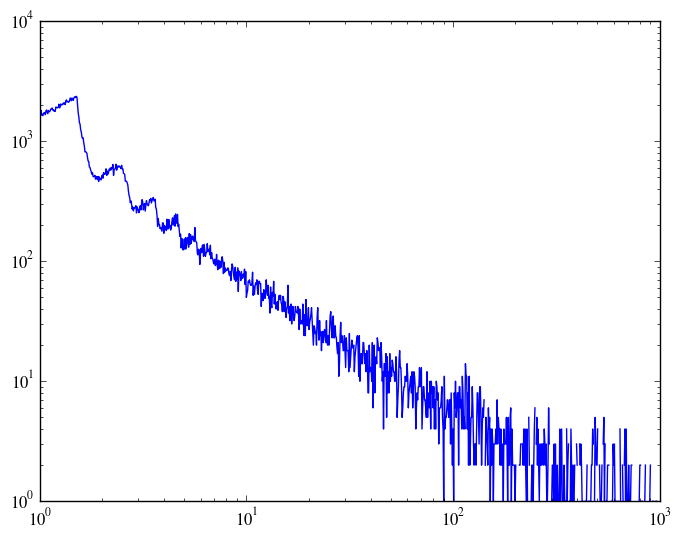

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1245ffcd0>

In [466]:
loglog(bins2[1:end-1], counts)

In [468]:
bins, counts = Base.hist(free_paths[free_paths .< 1000], 1000)

(0.0:1.0:996.0,[782193,151591,28697,11341,6202,3769,2661,1842,1387,1148  …  0,0,0,0,0,0,0,0,0,1])

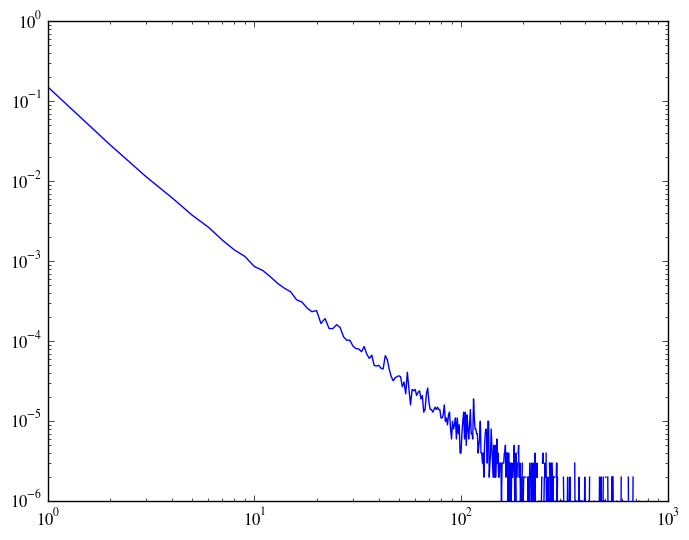

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x125c9c4d0>

In [471]:
loglog(bins[1:end-1], counts/sum(counts))

In [472]:
freqs = counts / sum(counts)

996-element Array{Float64,1}:
 0.782247   
 0.151601   
 0.028699   
 0.0113418  
 0.00620243 
 0.00376926 
 0.00266118 
 0.00184213 
 0.0013871  
 0.00114808 
 0.000860059
 0.000765053
 0.000634044
 ⋮          
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        
 1.00007e-6 

In [480]:
# Setup:
radius = 0.36

probs = float(counts)
probs /= sum(probs);
height_chooser = sampler(Categorical(probs));   # from Distributions

angles = Float64[]
N = 10^5
for i in 1:N
    xx, angle, height = sample(height_chooser)
    push!(angles, angle)
end

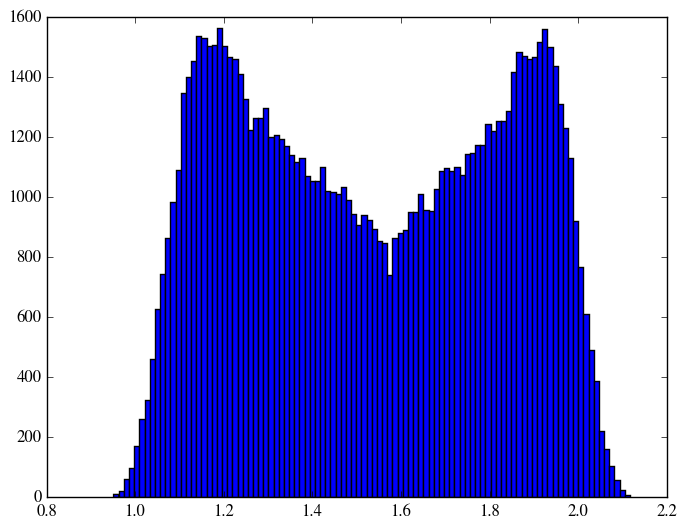

In [481]:
plt.hist(angles, 100);